This script generates Fig 2.1 of Reinforcement Learning: An Introduction Sutton

In [1]:
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
# n-armed bandit
n = 10
# number fo episodes
episodes = 2000
steps = 1000
mu,sigma = 0,1  # mean and standard deviation

In [3]:
def initialize_bandit(n,mu,sigma):
    q = np.random.normal(mu,sigma,n)
    return q

In [4]:
def update_action_value(Q,a,reward,action):
    Q[a] = Q[a]+(1/action[a])*((reward-Q[a]))
    return Q

In [5]:
def epsilon_greedy(Q,eps,step):
    p =  random.random()
    if p > eps and step > 1: # exploitation
        action = np.argmax(Q)
    else: # exploration
        action = np.random.choice(range(0,len(Q),1))
        
    return action

100%|██████████| 2000/2000 [03:25<00:00,  9.73it/s]


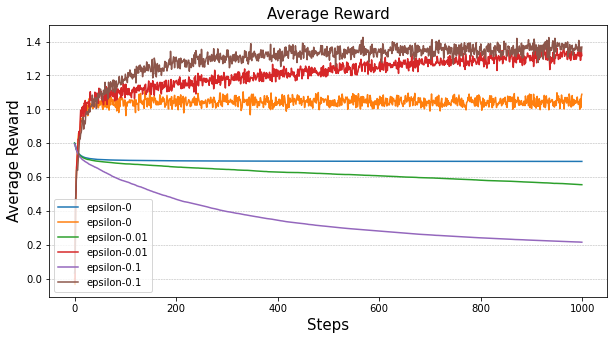

In [6]:
eps = [0,0.01,0.1]
fig,ax = plt.subplots(figsize=(10, 5))
ax.set_title('Average Reward',fontsize=15)
ax.set_xlabel('Steps',fontsize=15)
ax.set_ylabel('Average Reward',fontsize=15)
ax.yaxis.grid(linestyle='--', linewidth=0.5)
for e in eps:
    average_reward = []
    total_reward = np.zeros(steps)
    total_error = np.zeros(steps)
    for i in tqdm.tqdm(range(episodes)):
        q = initialize_bandit(n,mu,sigma) # Ground Truth Values
        Q = np.zeros(n)
        action = np.zeros(n)
        reward_per_ep = []
        error_per_ep = []
        for j in range(steps):
            a = epsilon_greedy(Q,e,j) # Select action based on estimate of Q
            action[a] +=1 # Keep tract of actions
            reward = q[a] + np.random.normal(mu,sigma)
            Q = update_action_value(Q,a,reward,action)
            err = mean_absolute_error(Q,q)
            error_per_ep.append(err)
            reward_per_ep.append(reward)
        total_reward += np.array(reward_per_ep)
        total_error += np.array(error_per_ep)
    average_reward = total_reward/episodes
    average_error = total_error/episodes
    plt.plot(range(0,steps),average_error,label=f'error-{e}')
    plt.plot(range(0,steps),average_reward,label=f'epsilon-{e}')
plt.legend()